In [10]:
#Magic function to display the plots in line and stored in the notebook document
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data,city_data,on = "city",how = "left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

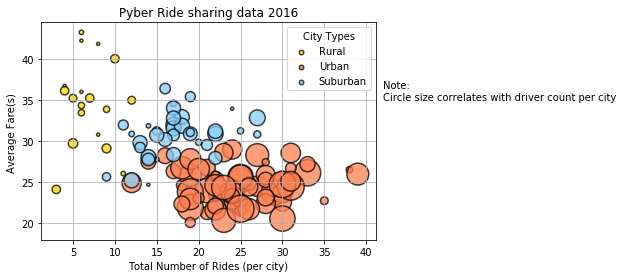

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Do a groupby on city and calculate total rides, avergae fare and driver count 
ride_share_data = pyber_df.groupby("city")
ride_count = ride_share_data["ride_id"].count()
average_fare = ride_share_data["fare"].mean()
avg_driver = ride_share_data["driver_count"].mean()

# set index to  city and extraxt the city type column
city_type = city_data.set_index('city')['type']

# create a data frame with the above results 
ride_df = pd.DataFrame({"Total Rides":ride_count,"Average Fare":average_fare,"Total Drivers":avg_driver,"City Type":city_type})

# create a seperate dataframe for rural,urban,suburban city types 
rural = ride_df.loc[ride_df['City Type'] == 'Rural']
urban = ride_df.loc[ride_df['City Type'] =='Urban']
suburban = ride_df.loc[ride_df['City Type']=='Suburban']


# Build the scatter plots for each city types
plt.scatter(rural["Total Rides"], rural["Average Fare"],color = "gold",edgecolors="black",s=rural["Total Drivers"]*10,alpha = 0.75,linewidth = 1.5)
plt.scatter(urban["Total Rides"], urban["Average Fare"],color = "coral",edgecolors="black",s= urban["Total Drivers"]*10,alpha = 0.75,linewidth = 1.5)
plt.scatter(suburban["Total Rides"], suburban["Average Fare"],color = "lightskyblue",edgecolors="black",s=suburban["Total Drivers"]*10,alpha = 0.75,linewidth = 1.5)

# Incorporate the other graph properties
plt.title("Pyber Ride sharing data 2016")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare(s) ")
labels = ["Rural","Urban","Suburban",]

# Create a legend
lgnd = plt.legend(labels,title = "City Types",loc="upper right")
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/pyber.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

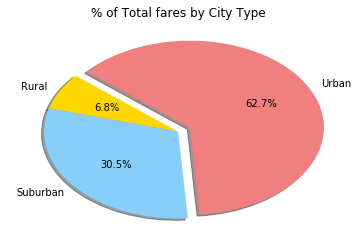

In [4]:
# Calculate Type Percents
# Do a groupby on count and claculate the total fares by city type using .sum()
fare_data = pyber_df.groupby("type")

total_fares = fare_data["fare"].sum()


# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total fares by City Type")

# Save Figure
plt.savefig("Images/totalfares.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

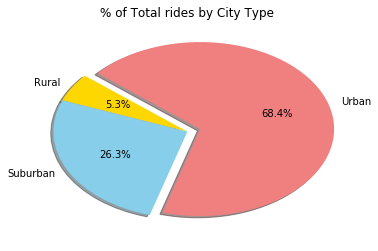

In [6]:
# Calculate Ride Percents
# Do a groupby on type and calculate total rides using .count()
ride_data = pyber_df.groupby("type")
total_rides = ride_data["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total rides by City Type")

# Save Figure
plt.savefig("Images/totalrides.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

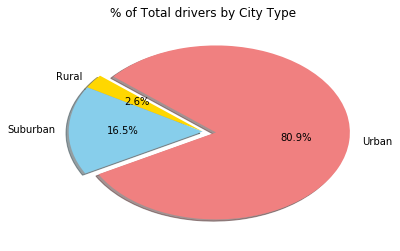

In [8]:
# Calculate Driver Percents
# do a groupby on city_data dataframe  to avoid duplicate driver count and calculate total drivers count 
driver_data = city_data.groupby("type")
total_drivers = driver_data["driver_count"].sum()


# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total drivers by City Type")


# Save Figure
plt.savefig("Images/totaldrivers.png")

In [9]:
# Show Figure
plt.show()